In [9]:
import sys
sys.path.append("../")
sys.path.append("../../")
from dataloader.svdd_dataloader import CollisionLoader_new
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import librosa
from load_data import load_data
from deepod.metrics import ts_metrics
from deepod.metrics import point_adjustment 
%matplotlib inline

In [10]:
train_imu,train_audio,train_spec,val_imu,val_audio,val_spec,val_imu_normal,val_audio_normal,val_spec_normal = load_data()

train_combine = np.concatenate([np.mean(train_audio,axis=-1),train_imu],axis=1)

test_audio_all = np.concatenate([val_audio_normal,val_audio],axis=0)
test_imu_all   = np.concatenate([val_imu_normal,val_imu],axis=0)
test_combine = np.concatenate([np.mean(test_audio_all,axis=-1),test_imu_all],axis=1)

labels_all = np.concatenate([np.zeros(val_audio_normal.shape[0]),np.ones(val_audio.shape[0])])

In [11]:
clf_audio = OneClassSVM(kernel='rbf',gamma='auto').fit(np.mean(train_audio,axis=-1))
clf_imu = OneClassSVM(kernel='rbf',gamma='auto').fit(train_imu)
clf_all = OneClassSVM(kernel='rbf',gamma='auto').fit(train_combine)

In [12]:
scores_audio      = -clf_audio.decision_function(np.mean(test_audio_all,axis=-1))
scores_imu        = -clf_imu.decision_function(test_imu_all)
scores_all        = -clf_all.decision_function(test_combine)
eval_metrics_audio = ts_metrics(labels_all, scores_audio)
eval_metrics_imu = ts_metrics(labels_all, scores_imu)
result_audio = eval_metrics_audio
result_imu = eval_metrics_imu
eval_metrics_all = ts_metrics(labels_all, scores_all)
result_all = eval_metrics_all

print(result_audio)
print(result_imu)
print(result_all)

In [13]:
eval_metrics_audio = ts_metrics(labels_all, scores_audio)
eval_metrics_imu = ts_metrics(labels_all, scores_imu)
result_audio = eval_metrics_audio
result_imu = eval_metrics_imu
eval_metrics_all = ts_metrics(labels_all, scores_all)
result_all = eval_metrics_all

print(result_audio)
print(result_imu)
print(result_all)

(0.9500287073490815, 0.9242016207465018, 0.8813948711688602, 0.8706786171574904, 0.8923884514435696)
(0.8550376001519546, 0.8548501419203385, 0.7867818907049261, 0.9192982456140351, 0.6876640419947506)
(0.9246194657411244, 0.9089133113807792, 0.838013743679104, 0.855191256830601, 0.821522309711286)


(-0.2, 2.0)

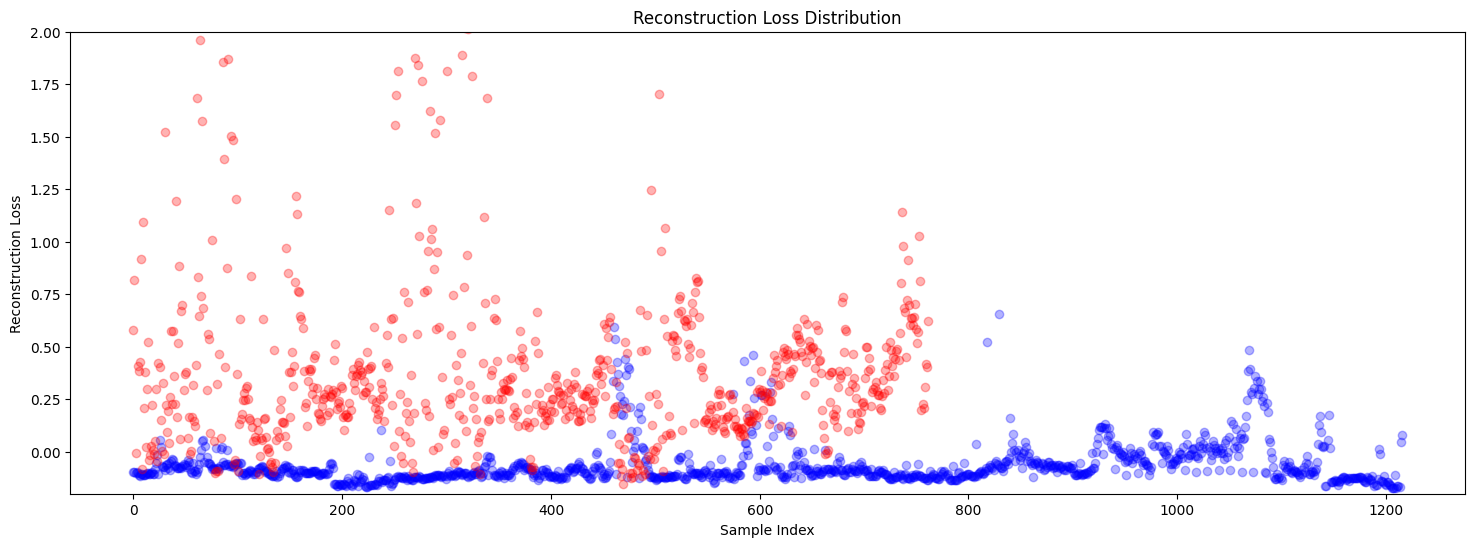

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.scatter(range(len(val_audio_normal)), scores_audio[:len(val_audio_normal)], color='blue', alpha=0.3, label='Train')
plt.scatter(range(len(val_audio)), scores_audio[len(val_audio_normal):], color='red', alpha=0.3, label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Loss')
plt.title('Reconstruction Loss Distribution')
plt.ylim(-0.2,2)

4770